In [1]:
%matplotlib inline

In [2]:
import os, glob
from pathlib import Path

import numpy as np
from numpy import nan as NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
print('seaborn version: ', sns.__version__)

numpy version:  1.21.5
pandas version:  1.3.5
matplotlib version:  2.2.5
seaborn version:  0.11.2


## Code to generate Figure 2C 

**Figure 2C** features
- the response rate per run (i.e., the proportion of trials for which a button press was recorded; left-side panel)
- the distributions of framewise displacement (in mm) averaged per run (middle panel) and plotted for every frame (right-side panel). 

To run the cells below, you will need to **pull the following input files**: 
* ***cneuromod-things/THINGS/glmsingle/sub-{s}/qc/sub-{s}_task-things_headmotion.tsv***
* ***cneuromod-things/THINGS/behaviour/sub-{s}/beh/sub-{s}_task-things_desc-perTrial_annotation.tsv***


In [4]:
# Response rate (left panel)

beh_file_path = Path("../../THINGS/behaviour").resolve()
fig_save_path = Path("../figures").resolve()


# Compute response rate per run for each subject

flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-*_task-things_desc-perTrial_annotation.tsv"))

col_names = ['subject_id', 'session_id', 'run_id', 'response_rate']
all_sub_rr_df = pd.DataFrame(columns=col_names) 

for file in flist:
    sub_num = os.path.basename(file).split('_')[0][-2:]
    sub_df = pd.read_csv(file, sep = '\t', low_memory=False)
    
    for sess in np.unique(sub_df['session_id']).tolist():
        df_ses = sub_df[sub_df['session_id'] == sess]
        runs = [x for x in np.unique(df_ses['run_id']).tolist()]
        for r in runs:
            df_run = df_ses[df_ses['run_id'] == r]#.dropna()
            
            resp_rate_r = 1 - (np.sum(df_run['response_txt'].isna()) / df_run.shape[0])
            
            run_entry = [f'sub-{sub_num}', sess, r, resp_rate_r]
            all_sub_rr_df = all_sub_rr_df.append(pd.Series(run_entry, index=col_names), ignore_index=True)


[]

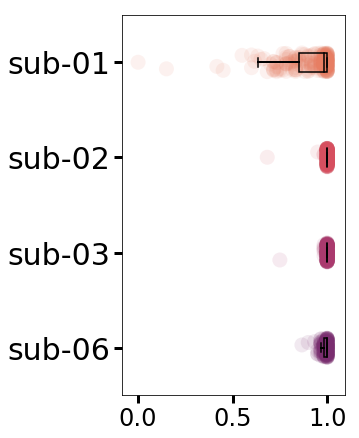

In [5]:
# Make response rate figure

# set to True to export .png file
save_fig = False

SMALL_SIZE = 8
MEDIUM_SIZE = 24
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


df = all_sub_rr_df

f, ax = plt.subplots(figsize=(4, 7))

dy="subject_id"; dx="response_rate"; ort="h"; 
pal = sns.color_palette("flare", 4)


ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, alpha=0.10, s=15, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .20, zorder = 10, 
               showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
               showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},
               saturation = 1, orient = ort)

ax.tick_params(width=3, size=8)

plt.xticks([0.0, 0.5, 1.0])
plt.xlabel('')
plt.ylabel('')

if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_response_rate_cloud.png", dpi=600, bbox_inches='tight')
plt.plot()


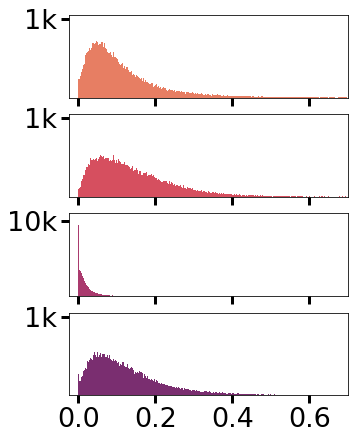

In [6]:
# FD per frame plot (right panel)

mot_file_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()

# set to True to export .png file
save_fig = False

SMALL_SIZE = 8
MEDIUM_SIZE = 27
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(4, 1, figsize=(5, 7))

sub_list = ['01', '02', '03', '06']
colors = [
    (0.90732341, 0.4939774, 0.38990532),
    (0.83765537, 0.30784814, 0.3723105),
    (0.66635279, 0.22717328, 0.43008427),
    (0.47936222, 0.18006056, 0.43733022),
]

for i in range(len(sub_list)):
    sub_num = sub_list[i]
    sub_df = pd.read_csv(
        f"{mot_file_path}/sub-{sub_num}/qc/sub-{sub_num}_task-things_headmotion.tsv",
        sep = '\t',
    ).dropna()
    raw_data = sub_df['framewise_displacement'].to_numpy() 
        
    axes[i].hist(sub_df['framewise_displacement'], bins=np.arange(0, 0.7, 0.0025), color=colors[i])
    axes[i].set_xlim((-0.025, 0.7))
    axes[i].set_xticks(ticks=[0.0, 0.2, 0.4, 0.6])
    axes[i].tick_params(width=3, size=8)
    
    if i == 2:
        axes[i].set_ylim((0, 11000))
        axes[i].set_yticks(ticks=[10000])
        axes[i].set_yticklabels(['10k'])
    else:
        axes[i].set_yticklabels(['0.9k'])
        axes[i].set_ylim((0, 1050))
        axes[i].set_yticks(ticks=[1000])
        axes[i].set_yticklabels(['1k'])
        
    if i == 3:
        axes[i].set_xticklabels([0.0, 0.2, 0.4, 0.6])
        axes[i].set_xlabel('')
    else:
        axes[i].set_xticklabels([])
        axes[i].set_xlabel('')
            
if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_fwd_distribution_perFrame.png", dpi=600, bbox_inches='tight')
plt.show()


In [7]:
# Mean FWD per run plot (middle panel)

# Average motion metrics per run for each subject

flist = sorted(glob.glob(f"{mot_file_path}/sub-*/qc/sub-*_task-things_headmotion.tsv"))

ids = ['subject_id', 'session_id', 'run_id']
col_names = ['framewise_displacement', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
all_sub_means_df = pd.DataFrame(columns=ids + ['mean_framewise_displacement']) 

for file in flist:
    sub_num = os.path.basename(file).split('_')[0][-2:]
    sub_df = pd.read_csv(file, sep = '\t')

    sub_df.insert(loc=0, column='subject_id', value=int(sub_num), allow_duplicates=True)
    
    for sess in np.unique(sub_df['session_id']).tolist():
        df_ses = sub_df[sub_df['session_id'] == sess]
        runs = [x for x in np.unique(df_ses['run_id']).tolist()]
        for r in runs:
            df_run = df_ses[df_ses['run_id'] == r].dropna()
            run_entry = [f'sub-{sub_num}', sess, r, df_run['framewise_displacement'].mean()]
            all_sub_means_df = all_sub_means_df.append(pd.Series(run_entry, index=ids + ['mean_framewise_displacement']), ignore_index=True)


[]

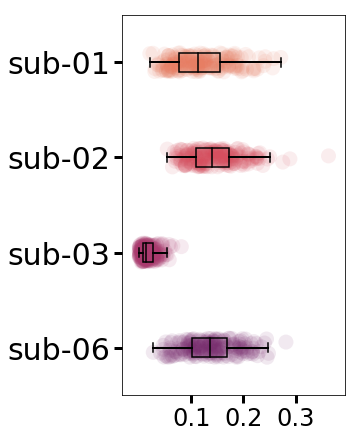

In [8]:
# Make figure

# set to True to export .png file
save_fig = False

SMALL_SIZE = 8
MEDIUM_SIZE = 24
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


df = all_sub_means_df

f, ax = plt.subplots(figsize=(4, 7))

dy="subject_id"; dx="mean_framewise_displacement"; ort="h"; 
pal = sns.color_palette("flare", 4)

ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, alpha=0.10, s=15, jitter = 1, zorder = 0, orient = ort)
    
ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .20, zorder = 10, 
               showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
               showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},
               saturation = 1, orient = ort)

ax.tick_params(width=3, size=8)

plt.xticks([0.1, 0.2, 0.3])
plt.xlabel('')
plt.ylabel('')

if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_fd distribution_perRun.png", dpi=600, bbox_inches='tight')
plt.plot()
